In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from scipy.optimize import minimize 
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision = 5, suppress = True, formatter={'float':lambda x: f'{x:6.3f}'})
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
raw = pd.read_csv(url, index_col = 0, parse_dates=True).dropna()

r = 0.005
market = '.SPX'
rets = np.log(raw / raw.shift(1)).dropna()
res = pd.DataFrame()

for sym in rets.columns[:4]:
    for year in range(2010, 2019):
        rets_ = rets.loc[f'{year}-01-01':f'{year}-12-31']
        muM = rets_[market].mean() * 252
        cov = rets_.cov().loc[sym, market]
        var = rets_[market].var()
        beta = cov / var
        rets_ = rets.loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
        muM = rets_[market].mean() * 252
        mu_capm = r + beta * (muM - r)
        mu_real = rets_[sym].mean() * 252
        res = res.append(pd.DataFrame({'symbol': sym,
                                        'beta': beta,
                                        'mu_capm': mu_capm,
                                        'mu_real': mu_real},
                                         index=[year + 1]),
                                         sort=True)



<ipython-input-1-545676256252>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-1-545676256252>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({'symbol': sym,
<ipython-input-1-545676256252>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({'symbol': sym,
<ipython-input-1-545676256252>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({'symbol': sym,
<ipython-input-

In [2]:
from sklearn.metrics import r2_score

reg = np.polyfit(res['beta'], res['mu_capm'], deg=1)
res['mu_capm_ols'] = np.polyval(reg, res['beta'])

r2_score(res['mu_capm'], res['mu_capm_ols'])

0.09272355783573527

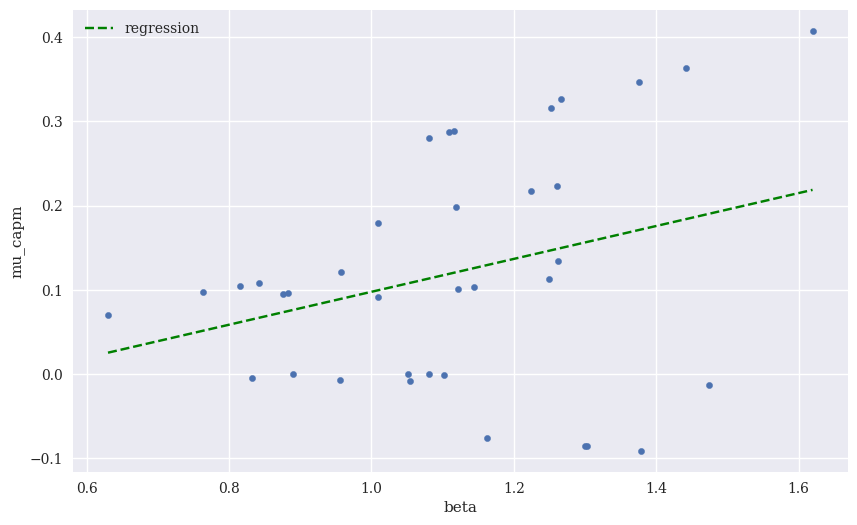

In [3]:
res.plot(kind='scatter', x='beta', y='mu_capm', figsize=(10, 6))
x = np.linspace(res['beta'].min(), res['beta'].max())
plt.plot(x, np.polyval(reg, x), 'g--', label='regression')
plt.legend();

In [4]:
reg = np.polyfit(res['beta'], res['mu_real'], deg=1)
res['mu_real_ols'] = np.polyval(reg, res['beta'])

In [5]:
r2_score(res['mu_real'], res['mu_real_ols'])

0.04466919444752937

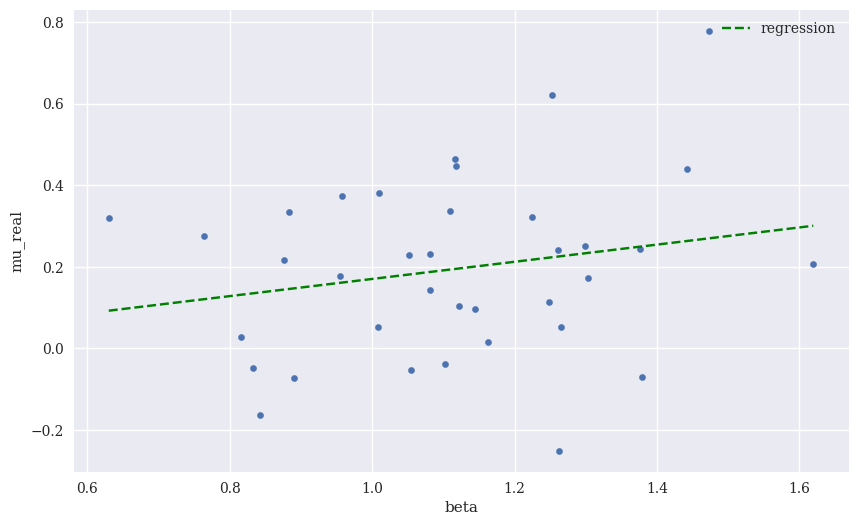

In [6]:
res.plot(kind='scatter', x='beta', y='mu_real', figsize=(10, 6))
x = np.linspace(res['beta'].min(), res['beta'].max())
plt.plot(x, np.polyval(reg, x), 'g--', label='regression')
plt.legend();